# gender classification

# Problem Statement
Dataset Analysis:

1.The dataset (gender_classification.csv) is loaded and inspected.

Column names and other exploratory steps are likely included.
Preprocessing & Feature Engineering:

2.Data preprocessing steps such as encoding categorical variables (e.g., LabelEncoder).

Standardization (StandardScaler) might be applied to numerical features.
Machine Learning Models for Classification:

3.Models like SVM (Support Vector Machine), Random Forest, Decision Tree, Logistic Regression, are considered.

Cross-validation is likely used to validate model performance

# Content
This dataset contains 7 features and a label column.

long_hair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".

forehead_width_cm - This column is in CM's. This is the width of the forehead.

forehead_height_cm - This is the height of the forehead and it's in Cm's.

nose_wide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".

nose_long - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".

lips_thin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".

distance_nose_to_lip_long - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

gender - This is either "Male" or "Female".

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df=pd.read_csv("gender_classification.csv")
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [4]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [32]:
df.info()#no null and no object dtype cols

<class 'pandas.core.frame.DataFrame'>
Index: 3233 entries, 0 to 4995
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  3233 non-null   int64  
 1   forehead_width_cm          3233 non-null   float64
 2   forehead_height_cm         3233 non-null   float64
 3   nose_wide                  3233 non-null   int64  
 4   nose_long                  3233 non-null   int64  
 5   lips_thin                  3233 non-null   int64  
 6   distance_nose_to_lip_long  3233 non-null   int64  
 7   gender                     3233 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 227.3+ KB


In [6]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4996     True
4997     True
4998     True
4999     True
5000     True
Length: 5001, dtype: bool

In [9]:
df=df.drop_duplicates()

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['gender'].value_counts()

gender
Male      1783
Female    1450
Name: count, dtype: int64

In [59]:
df.loc[:, "gender"] = df["gender"].replace(
    {"Male": 0, "Female": 1}).astype(int)

In [60]:
df["gender"].value_counts()

gender
0    1783
1    1450
Name: count, dtype: int64

<Axes: >

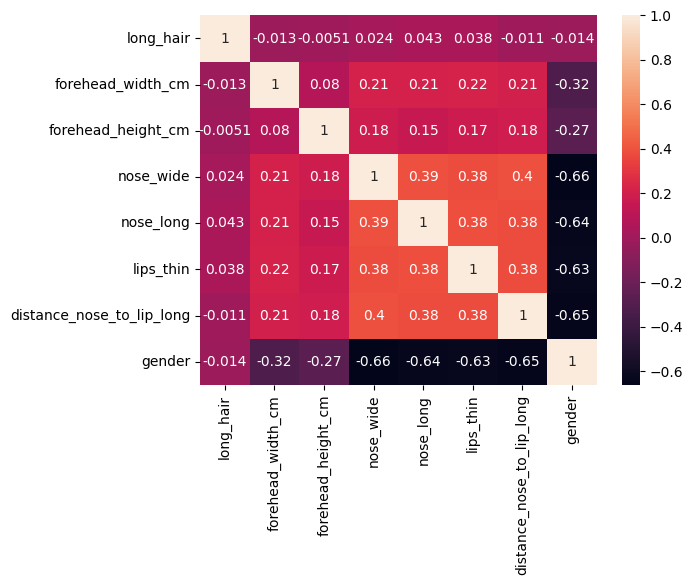

In [88]:
sns.heatmap(df.corr(),annot=True)

In [62]:
df.describe()
##gender ,has litle skweness

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000
mean,0.822456,13.217198,5.966038,0.536344,0.557686,0.538509,0.545314,0.448500
std,0.382188,1.115993,0.549789,0.498755,0.496738,0.498592,0.498019,0.497418
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.300000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.200000,5.900000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,14.100000,6.400000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000,1.000000


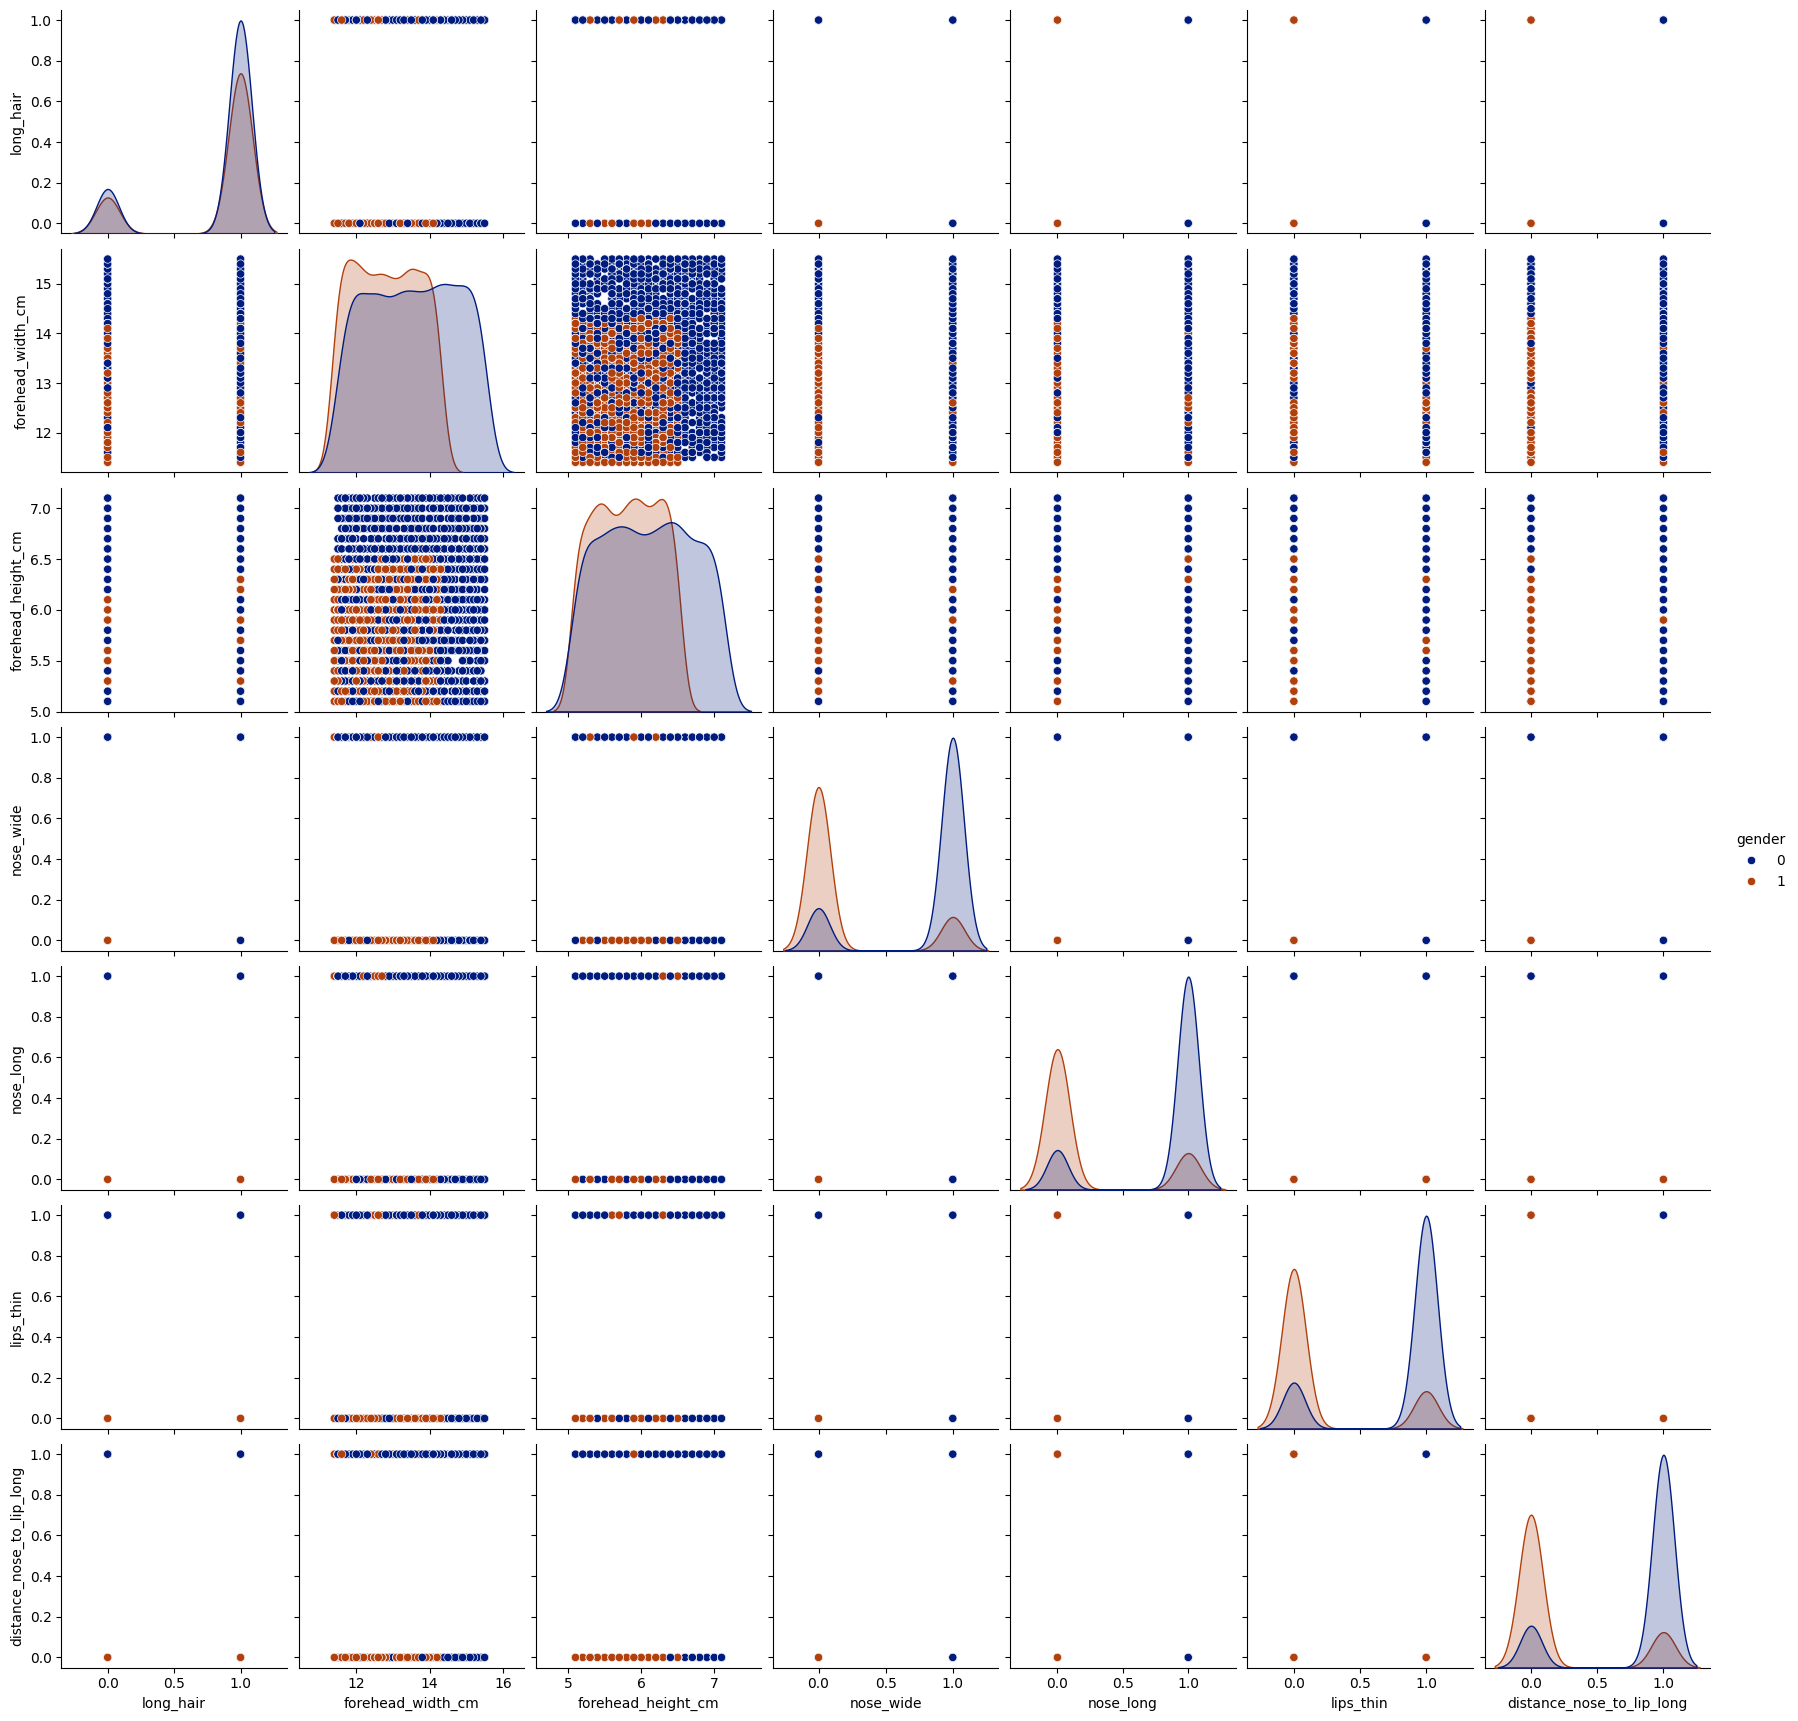

In [63]:
sns.pairplot(data=df,hue="gender",palette="dark")

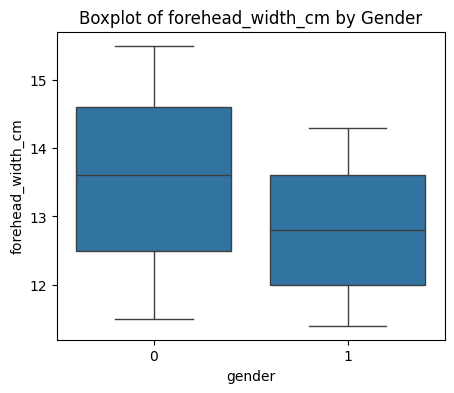

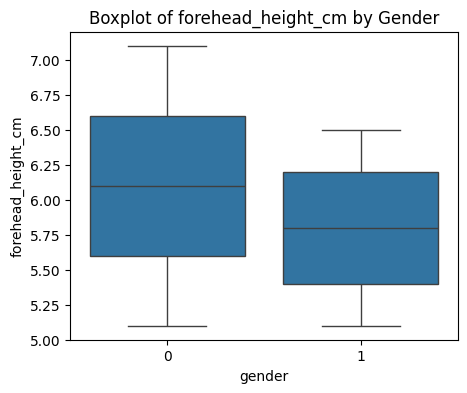

In [65]:
for col in df.select_dtypes(include=['float']).columns:
    plt.figure(figsize=(5, 4))  # Set figure size for better readability
    sns.boxplot(data=df, y=df[col], x="gender")  # Corrected column name
    plt.title(f"Boxplot of {col} by Gender")
    plt.show()

In [37]:
features=df.drop("gender",axis=1)
target=df["gender"]

In [40]:
# putting stratify because  target is imbalanced.
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=10,test_size=0.25,stratify=target)
print(f"Training Data: {xtrain.shape, ytrain.shape}")
print(f"training Data: {xtest.shape, ytest.shape}")

Training Data: ((2424, 7), (2424,))
training Data: ((809, 7), (809,))


In [66]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    ##checkon overfitting and underfitting
    training_score=model.score(xtrain,ytrain)
    testing_score=model.score(xtest,ytest)
    print(f"Traning Score : {training_score}")
    print(f"Testing score: {testing_score}")
    print(f"confusion matrix : \n{confusion_matrix(ytest,ypred)}")
    ##classification report
    print(f"Classificatin report : \n{classification_report(ytest,ypred)}")
    return model

In [67]:
mymodel(LogisticRegression())

Traning Score : 0.9517326732673267
Testing score: 0.9456118665018541
confusion matrix : 
[[340  23]
 [ 21 425]]
Classificatin report : 
              precision    recall  f1-score   support

      Female       0.94      0.94      0.94       363
        Male       0.95      0.95      0.95       446

    accuracy                           0.95       809
   macro avg       0.95      0.94      0.95       809
weighted avg       0.95      0.95      0.95       809



LogisticRegression()

In [68]:
mymodel(DecisionTreeClassifier())

Traning Score : 0.9975247524752475
Testing score: 0.9332509270704573
confusion matrix : 
[[342  21]
 [ 33 413]]
Classificatin report : 
              precision    recall  f1-score   support

      Female       0.91      0.94      0.93       363
        Male       0.95      0.93      0.94       446

    accuracy                           0.93       809
   macro avg       0.93      0.93      0.93       809
weighted avg       0.93      0.93      0.93       809



DecisionTreeClassifier()

In [72]:
parameters={
    "criterion":["gini","entropy"],
    "max_depth":list(range(4,15)),
    "min_samples_leaf":list(range(4,15))
}

In [73]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(DecisionTreeClassifier(),parameters,verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 242 candidates, totalling 1210 fits
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   0.5s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                              14]},
             verbose=2)

In [74]:
grid.best_score_

np.float64(0.9562775837096362)

In [75]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4)

In [76]:
dt=mymodel(grid.best_estimator_)
dt
#still results are sying overfitting is there

Traning Score : 0.9682343234323433
Testing score: 0.9493201483312732
confusion matrix : 
[[348  15]
 [ 26 420]]
Classificatin report : 
              precision    recall  f1-score   support

      Female       0.93      0.96      0.94       363
        Male       0.97      0.94      0.95       446

    accuracy                           0.95       809
   macro avg       0.95      0.95      0.95       809
weighted avg       0.95      0.95      0.95       809



DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4)

In [77]:
dt.feature_importances_

array([0.001394  , 0.0572795 , 0.0491534 , 0.39213466, 0.16802297,
       0.20378856, 0.12822692])

In [78]:
xtrain.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long'],
      dtype='object')

soft margin and hard svm incases were data is not perfectly seperble svm usess soft margine along sum miss calsifcation but panalyzing them with the hel of regulation peramiter dinoted by c which derminets per out between maximizing and minimizing clasification erorr



In [79]:
mymodel(SVC())

Traning Score : 0.9554455445544554
Testing score: 0.9555006180469716
confusion matrix : 
[[350  13]
 [ 23 423]]
Classificatin report : 
              precision    recall  f1-score   support

      Female       0.94      0.96      0.95       363
        Male       0.97      0.95      0.96       446

    accuracy                           0.96       809
   macro avg       0.95      0.96      0.96       809
weighted avg       0.96      0.96      0.96       809



SVC()

In [80]:
from sklearn.pipeline import make_pipeline

In [81]:
clf = make_pipeline(StandardScaler(),SVC())


In [82]:
mymodel(clf)

Traning Score : 0.966996699669967
Testing score: 0.957972805933251
confusion matrix : 
[[355   8]
 [ 26 420]]
Classificatin report : 
              precision    recall  f1-score   support

      Female       0.93      0.98      0.95       363
        Male       0.98      0.94      0.96       446

    accuracy                           0.96       809
   macro avg       0.96      0.96      0.96       809
weighted avg       0.96      0.96      0.96       809



Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

hi c hard marging that is less miss clasifcation and over fiting miss it is use ful when the data perfuctly low c value is soft margine that is more miss clasiftion and beter junraliztion soft margine small c is beter for real word noile data

In [83]:
# generally c and gama value is taken as 0.001,0.01,0.1,1,10
# gird search cv for doing hyperparameter tuning 
parameter={
    "c":[0.001,0.01,0.1,1,10],
    "gamma":[0.001,0.01,0.1,1,10],
    "kernel":["rbf"]
}
from sklearn.model_selection import GridSearchCV
gird=GridSearchCV(SVC(),parameter,verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 242 candidates, totalling 1210 fits
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                              14]},
             verbose=2)

In [84]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4}

In [85]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4)

In [86]:
mymodel(grid.best_estimator_)

Traning Score : 0.9682343234323433
Testing score: 0.9493201483312732
confusion matrix : 
[[348  15]
 [ 26 420]]
Classificatin report : 
              precision    recall  f1-score   support

      Female       0.93      0.96      0.94       363
        Male       0.97      0.94      0.95       446

    accuracy                           0.95       809
   macro avg       0.95      0.95      0.95       809
weighted avg       0.95      0.95      0.95       809



DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4)

In [87]:
from sklearn.naive_bayes import GaussianNB
mymodel(GaussianNB())

Traning Score : 0.9587458745874587
Testing score: 0.9604449938195303
confusion matrix : 
[[355   8]
 [ 24 422]]
Classificatin report : 
              precision    recall  f1-score   support

      Female       0.94      0.98      0.96       363
        Male       0.98      0.95      0.96       446

    accuracy                           0.96       809
   macro avg       0.96      0.96      0.96       809
weighted avg       0.96      0.96      0.96       809



GaussianNB()